In [263]:
from churn_data import ChurnData

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [203]:
param_grid = {
    'max_features': range(10,30),
    'max_depth': range(5,15),
    'min_samples_leaf': range(8,20)
}

In [204]:
data = ChurnPrediction()

In [205]:
X_train = np.copy(data.X_train)
y_train = np.copy(data.y_train)

In [42]:
model = RandomForestClassifier()

In [43]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=16)

In [44]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    3.8s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   28.6s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:  1.4min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:  3.1min
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:  4.9min
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:  7.4min
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed: 10.7min
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed: 14.9min
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed: 20.0min
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed: 26.4min
[Parallel(n_jobs=16)]: Done 6018 tasks      | elapsed: 33.3min
[Parallel(n_jobs=16)]: Done 7168 tasks      | elapsed: 42.0min
[Parallel(n_jobs=16)]: Done 7200 out of 7200 | elapsed: 42.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=16,
       param_grid={'max_features': range(10, 30), 'max_depth': range(5, 15), 'min_samples_leaf': range(8, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [47]:
Kgrid.best_params_

{'max_depth': 6, 'max_features': 20, 'min_samples_leaf': 18}

In [66]:
resDF = pd.DataFrame.from_records(grid.cv_results_['params'])
resDF['mean_test_score'] = grid.cv_results_['mean_test_score']
resDF['mean_train_score'] = grid.cv_results_['mean_train_score']

In [71]:
resDF.columns

Index(['max_depth', 'max_features', 'min_samples_leaf', 'mean_test_score',
       'mean_train_score'],
      dtype='object')

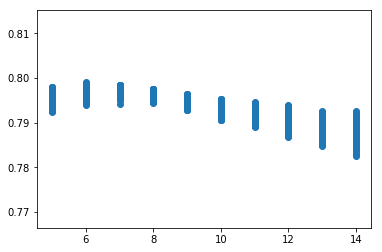

In [81]:
plt.scatter(resDF.max_depth, resDF.mean_test_score)

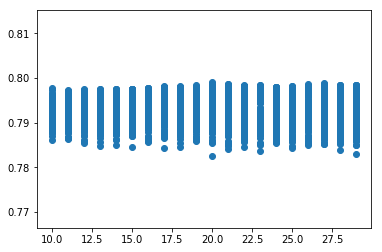

In [82]:
plt.scatter(resDF.max_features, resDF.mean_test_score)

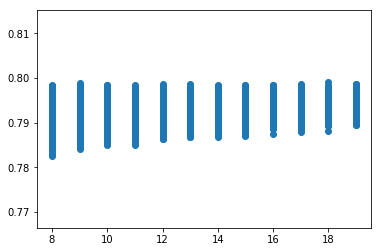

In [83]:
plt.scatter(resDF.min_samples_leaf, resDF.mean_test_score)

In [85]:
model = RandomForestClassifier(**grid.best_params_)

In [87]:
model.fit(data.X_train, data.y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=18,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [88]:
data.testModel(model)

Accuracy: 0.7353305785123967

AUC: 0.8058515741972688

             precision    recall  f1-score   support

        0.0       0.78      0.82      0.80      6195
        1.0       0.64      0.59      0.62      3485

avg / total       0.73      0.74      0.73      9680



/home/georg/.anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/metrics/classification.py:105: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  return np.average(sample_score, weights=sample_weight)


In [92]:
topFeatures = pd.DataFrame(list(zip(['intercept'] + data.features, model.feature_importances_))).sort_values(by=1, ascending=False)

In [96]:
topFeatures[0].values[:17]

array(['recency', 'logNumSessions', 'numSessions', 'deltaPrev_wght_avg',
       'logDeltaPrev_avg', 'logNumDivisions_wght_avg',
       'dayOfMonth_wght_avg', 'logDeltaPrev_wght_avg', 'deltaPrev_avg',
       'logSessionLen_avg', 'logSessionLen_wght_avg', 'logPrice_wght_avg',
       'price_avg', 'dayOfWeek_wght_avg', 'logNumItemsViewed_wght_avg',
       'logPrice_avg', 'dayOfMonth_avg'], dtype=object)

### Using fewer features

In [264]:
data2 = ChurnData(features=['recency', 'logNumSessions', 'deltaPrev_wght_avg',
       'logNumDivisions_wght_avg', 'dayOfMonth_wght_avg', 'logSessionLen_avg'])#, 'logPrice_wght_avg',
#        'dayOfWeek_wght_avg', 'logNumItemsViewed_wght_avg','dayOfMonth_avg'])

In [234]:
param_grid2 = {
    'max_features': range(1,4),
    'max_depth': range(2,10),
    'min_samples_leaf': range(12,25),
    'n_estimators': [100]
}

In [235]:
X_train2 = np.copy(data2.X_train)
y_train2 = np.copy(data2.y_train)

In [236]:
model2 = RandomForestClassifier()

In [237]:
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid2, scoring='roc_auc', verbose=1, n_jobs=16)

In [238]:
grid2.fit(X_train2, y_train2)

Fitting 3 folds for each of 312 candidates, totalling 936 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    4.7s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   37.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:  1.9min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:  4.4min
[Parallel(n_jobs=16)]: Done 936 out of 936 | elapsed:  5.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=16,
       param_grid={'n_estimators': [100], 'max_features': range(1, 4), 'max_depth': range(2, 10), 'min_samples_leaf': range(12, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [239]:
grid2.best_params_

{'max_depth': 8,
 'max_features': 1,
 'min_samples_leaf': 18,
 'n_estimators': 100}

In [265]:
model2 = RandomForestClassifier(n_estimators=100, max_features=3, max_depth=8, min_samples_leaf=18)

In [266]:
model2.fit(data2.X_train, data2.y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=18,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [268]:
data2.getScore(model2)

Accuracy: 0.6848381601362862

AUC: 0.7541821357866543

             precision    recall  f1-score   support

        0.0       0.74      0.63      0.68      1550
        1.0       0.64      0.75      0.69      1385

avg / total       0.69      0.68      0.68      2935

Confusion matrix:
 [[ 977  573]
 [ 352 1033]]


/home/georg/.anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/metrics/classification.py:105: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  return np.average(sample_score, weights=sample_weight)


In [269]:
model2.feature_importances_

array([ 0.40822599,  0.27965403,  0.1410408 ,  0.03771928,  0.06925478,
        0.06410513])